##Stochastic Gradient Descent Regresser

By: Maddy

SGD: Stochastic Gradient Descent is an optimisation techique which is used to find the optimal weights for the model. It converges when it reaches the minima. Stochastic means random and in this technique also datapoints are choosed ra ndomly so it is known as Stochastic Gradient Descent.

In [89]:
# Importing required libraries
from sklearn.datasets import load_boston
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.preprocessing import StandardScaler
from math import sqrt
from prettytable import PrettyTable
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error

##### Loading Boston Data

In [42]:
boston = load_boston() # Loading Boston Dataset

In [43]:
print(boston.data.shape) # Shape of the dataset

(506, 13)


In [44]:
print(boston.feature_names) #Feature names

['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


In [45]:
data = boston.data    
boston_df = pd.DataFrame(data)
X = boston_df  
Y = boston.target

##### Standardisation

In [46]:
#Standardisation of the dataset
sc = StandardScaler()
dataset = sc.fit_transform(X)

## SGD from Scratch

In [139]:
# Building SGD from Scratch
def Sgd_Scratch(X,Y,w,lr=0.01,iteration=50):
    
    length = len(Y) #  length of the data set

    for iter in range(iteration): # iteration 
        sum_error = 0
        
        for i in range(length):
            batch_size = np.random.randint(0,length)  # randomising batch size for every iteration 
            Xi = X[batch_size,:].reshape(1,X.shape[1])
            Yi = Y[batch_size].reshape(1,1)
            pred = np.dot(Xi,w)            
            #Calculating error
            error = pred - Yi 
            sum_error += error**2          
            #Updating weight            
            w = w -(2/length)*lr*( Xi.T.dot((pred - Yi)))
        
        print('---> Iteration number =%d, learning rate=%.5f, error=%.5f' % (iter, lr, sum_error/length))
                
    return w



In [74]:
def prediction(data,weight):
    """Predicting y hat using data X and optimal weights"""
    y_pred = data.dot(weight)
    y_pred = y_pred.ravel()
    return y_pred

#### Getting optimal weights

In [140]:
data = np.c_[np.ones((len(dataset),1)),dataset] #making the shape of data as (506,14)
print(np.shape(data))
lr =0.1 #learning_rate
n_iter = 200 #no.of iterations
initial_weight = np.random.randn(14,1)  #picking the initial random weights and intercept  
optimal_weight = Sgd_Scratch(data,Y,initial_weight,lr,n_iter)
np.shape(data)

(506, 14)
---> Iteration number =0, learning rate=0.10000, error=387.91337
---> Iteration number =1, learning rate=0.10000, error=271.83991
---> Iteration number =2, learning rate=0.10000, error=184.76785
---> Iteration number =3, learning rate=0.10000, error=143.78593
---> Iteration number =4, learning rate=0.10000, error=101.27270
---> Iteration number =5, learning rate=0.10000, error=80.75105
---> Iteration number =6, learning rate=0.10000, error=51.93813
---> Iteration number =7, learning rate=0.10000, error=46.30375
---> Iteration number =8, learning rate=0.10000, error=33.79043
---> Iteration number =9, learning rate=0.10000, error=33.89856
---> Iteration number =10, learning rate=0.10000, error=23.15926
---> Iteration number =11, learning rate=0.10000, error=38.64851
---> Iteration number =12, learning rate=0.10000, error=25.56241
---> Iteration number =13, learning rate=0.10000, error=24.24972
---> Iteration number =14, learning rate=0.10000, error=30.04777
---> Iteration numbe

---> Iteration number =130, learning rate=0.10000, error=20.57446
---> Iteration number =131, learning rate=0.10000, error=22.64060
---> Iteration number =132, learning rate=0.10000, error=22.12773
---> Iteration number =133, learning rate=0.10000, error=18.35749
---> Iteration number =134, learning rate=0.10000, error=19.70247
---> Iteration number =135, learning rate=0.10000, error=23.34333
---> Iteration number =136, learning rate=0.10000, error=19.53856
---> Iteration number =137, learning rate=0.10000, error=22.47153
---> Iteration number =138, learning rate=0.10000, error=24.27590
---> Iteration number =139, learning rate=0.10000, error=24.17444
---> Iteration number =140, learning rate=0.10000, error=23.67769
---> Iteration number =141, learning rate=0.10000, error=19.56588
---> Iteration number =142, learning rate=0.10000, error=18.94164
---> Iteration number =143, learning rate=0.10000, error=21.38877
---> Iteration number =144, learning rate=0.10000, error=20.80553
---> Itera

(506, 14)

In [141]:
print('Optimal Weights generated from SGD from scratch are: \n')
print(optimal_weight[1:])

print('\nIntercept for self implemented SGD:')
print(optimal_weight[0][0])

Optimal Weights generated from SGD from scratch are: 

[[-1.01049012]
 [ 1.17066852]
 [ 0.07940135]
 [ 0.66715252]
 [-2.07051425]
 [ 2.46931733]
 [ 0.03893245]
 [-3.20073563]
 [ 2.59105203]
 [-1.9261196 ]
 [-2.17953028]
 [ 0.77483912]
 [-3.71072036]]

Intercept for self implemented SGD:
22.617593879337402


In [143]:
#Calculating mean squared error.
print("Mean squared error using SGD from Scratch: \n")
print(mean_squared_error(Y, prediction(data,optimal_weight)))

Mean squared error using SGD from Scratch: 

21.967053511387434


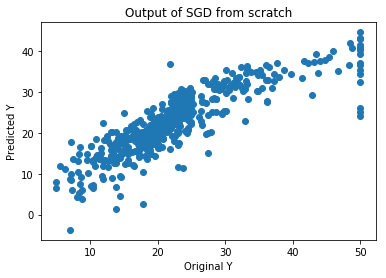

In [153]:
#Plotting Actual Y and predicted Y
plt.title("Output of SGD from scratch")
plt.scatter(Y,prediction(data,optimal_weight))
plt.xlabel("Original Y")
plt.ylabel("Predicted Y")
plt.show()

## SGD from SKlearn

In [145]:
clf = SGDRegressor()
clf.fit(dataset, Y)
print(clf.coef_) #printing coefficients

[-0.68834297  0.64139974 -0.28220295  0.71277343 -0.94900192  3.06755025
 -0.11553919 -2.29518843  0.94347728 -0.48653237 -1.71886155  0.86126053
 -3.38902041]


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\stochastic_gradient.py:128: FutureWarning: max_iter and tol parameters have been added in <class 'sklearn.linear_model.stochastic_gradient.SGDRegressor'> in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  "and default tol will be 1e-3." % type(self), FutureWarning)


In [146]:
#Mean squared error
print("Mean squared error using SGD from Sklearn: \n")
print(mean_squared_error(Y, clf.predict(dataset)))


Mean squared error using SGD from Sklearn: 

22.93461804033045


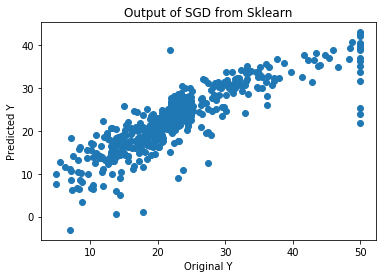

In [154]:
#Plotting Actual Y and predicted Y
plt.title("Output of SGD from Sklearn")
plt.scatter(Y,clf.predict(dataset))
plt.xlabel("Original Y")
plt.ylabel("Predicted Y")
plt.show()

## Conclusion

In [147]:
sgdscratch=list(optimal_weight[1:])
sgdsklearn=list(clf.coef_)
print("Coefficients as per scratch model and sklearn model \n")
print("SGD Scratch   SGD Sklearn \n")
for i in range(0,13):
    
    print(sgdscratch[i],"    ",sgdsklearn[i],"\n")

Coefficients as per scratch model and sklearn model 

SGD Scratch   SGD Sklearn 

[-1.01049012]      -0.6883429706682378 

[1.17066852]      0.6413997414108491 

[0.07940135]      -0.2822029536574523 

[0.66715252]      0.7127734320270798 

[-2.07051425]      -0.949001921421888 

[2.46931733]      3.067550247190174 

[0.03893245]      -0.11553919362906341 

[-3.20073563]      -2.2951884318953746 

[2.59105203]      0.9434772823485562 

[-1.9261196]      -0.4865323679254272 

[-2.17953028]      -1.7188615543053676 

[0.77483912]      0.8612605286273537 

[-3.71072036]      -3.389020407486376 



In [148]:
pretty = PrettyTable(["Type of SGD","Mean Squared Error"])

pretty.add_row(["Sklearn",22.93461804033045])
pretty.add_row(["SGD Scratch",21.967053511387434])

print(pretty)

+-------------+--------------------+
| Type of SGD | Mean Squared Error |
+-------------+--------------------+
|   Sklearn   | 22.93461804033045  |
| SGD Scratch | 21.967053511387434 |
+-------------+--------------------+


**Observations:** The MSE for both the SGDs are very close but when ran multiple times with **different learning** rates sometimes Sklearn performs a bit better and sometime SGD from scratch. The optimal weights and intercept is also very similar for both the models.

Thank YOU :)